# Unzip folder

In [ ]:
! unzip /content/drive/MyDrive/ML/PetImages.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: PetImages/Dog/5499.jpg  
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/55

# convert data into appropriate type

In [ ]:
import os
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split

images = []
labels = []
dict_labels = {"Cat": 0, "Dog": 1}
size = (40, 40)

# load all picture into list and give them label
for folders in glob.glob("PetImages/*"):
  print(folders, "pictures loading...")
  for filename in os.listdir(folders):
    label = folders.split("/")[-1]
    try:
      img = cv2.imread(os.path.join(folders, filename))
      if img is not None:
        img = cv2.resize(img, dsize = size)
        images.append(img)
        labels.append(dict_labels[label])
    except:
      print(os.path.join(folders, filename), "can not load.")

# split picture into train set and test set
train_feature, test_feature, train_label, test_label = train_test_split(images, labels, test_size = 0.2, random_state = 42)

# convert from list into matrix
train_feature = np.array(train_feature)
test_feature = np.array(test_feature)
train_label = np.array(train_label)
test_label = np.array(test_label)
print("The length of train_feature: ", len(train_feature))
print("The length of test_feature:", len(test_feature))
print("The shape of train_feature: ", train_feature.shape, ", the shape of train_label: ", train_label.shape)
print("The shape of test_feature: ", test_feature.shape, ", the shape of test_label: ", test_label.shape)

# store the features and labels into a folder
imagesavepath = "Cat_Dog_Dataset/"
if not os.path.exists(imagesavepath):
  os.makedirs(imagesavepath)
np.save(imagesavepath + "train_feature.npy", train_feature)
np.save(imagesavepath + "test_feature.npy", test_feature)
np.save(imagesavepath + "train_label.npy", train_label)
np.save(imagesavepath + "test_label.npy", test_label)

print("Features and labels have been stored.")

PetImages/Cat pictures loading...
PetImages/Dog pictures loading...
The length of train_feature:  19955
The length of test_feature: 4989
The shape of train_feature:  (19955, 40, 40, 3) , the shape of train_label:  (19955,)
The shape of test_feature:  (4989, 40, 40, 3) , the shape of test_label:  (4989,)
Features and labels have been stored.


# training CNN model

Load *.npy
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 40, 40, 10)        760       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 10)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 20, 20, 10)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 20)        5020      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 20)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 10, 10,

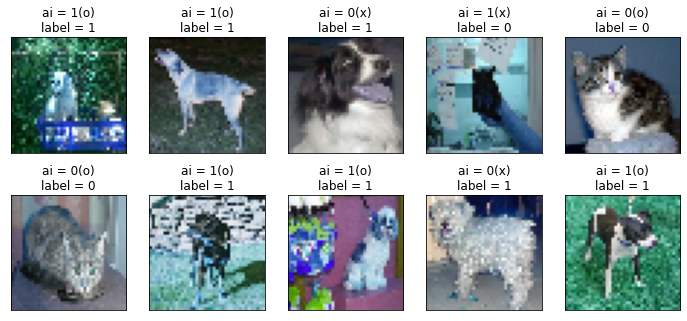

In [ ]:
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# show images and the correctness of prictions in a table
def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25:
    num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(images[start_id])
    if (len(predictions) > 0):
      title = "ai = " + str(predictions[start_id])
      title += ("(o)" if predictions[start_id] == labels[start_id] else "(x)")
      title += "\nlabel = " + str(labels[start_id])
    else:
      title = "label = " + str(labels[start_id])
    ax.set_title(title, fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()

# load the features and labels
imagesavepath = "Cat_Dog_Dataset/"
train_feature = np.load(imagesavepath + "train_feature.npy")
test_feature = np.load(imagesavepath + "test_feature.npy")
train_label = np.load(imagesavepath + "train_label.npy")
test_label = np.load(imagesavepath + "test_label.npy")
print("Load *.npy")

# convert from array into vector
train_feature_vector = train_feature.reshape(len(train_feature), 40, 40, 3).astype("float32")
test_feature_vector = test_feature.reshape(len(test_feature), 40, 40, 3).astype("float32")

# normalize the vector
train_feature_normalize = train_feature_vector / 255
test_feature_normalize = test_feature_vector / 255

# covert the labels intp onehot code
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

# constuct model
model = Sequential()
# add first convolution layer
model.add(Conv2D(filters = 10, kernel_size = (5, 5), padding = "same", input_shape = (40, 40, 3), activation = "relu"))
# add first pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))
# add dropout
model.add(Dropout(0.1))
# add second convolution layer
model.add(Conv2D(filters = 20, kernel_size = (5, 5), padding = "same", activation = "relu"))
# add second pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))
# add dropout
model.add(Dropout(0.2))
# add flatten layer(convert feature into one-dimension vector)
model.add(Flatten())

# construct MLP
model.add(Dense(units = 512, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))
model.summary()

# set train mode
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

try:
  model.load_weight("Pet_CNN_model.weight")
  print("Load model weight success, keep training the model.")
except:
  print("Load model weight failed, train a new model.")

# start training model
train_history = model.fit(x = train_feature_normalize, y = train_label_onehot, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

# evaluate the model
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("\nAccuracy: ", scores[1])

# predict the test set
prediction = model.predict(test_feature_normalize)
prediction = np.argmax(prediction, axis = 1)

# save model
model.save("Pet_CNN_model.h5")
model.save_weights("Pet_CNN_model.weight")
print("Model and weight have stored.")

del model

# show the result
show_images_labels_predictions(test_feature, test_label, prediction, 0)

# use existed CNN model to do prediction

Load *.npy.
Loading model Pet_CNN_model.h5


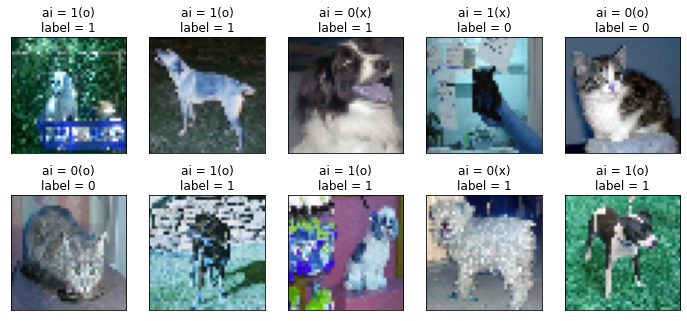

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# show images and the correctness of prictions in a table
def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25:
    num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(images[start_id])
    if (len(predictions) > 0):
      title = "ai = " + str(predictions[start_id])
      title += ("(o)" if predictions[start_id] == labels[start_id] else "(x)")
      title += "\nlabel = " + str(labels[start_id])
    else:
      title = "label = " + str(labels[start_id])
    ax.set_title(title, fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()

imagesavepath = "Cat_Dog_Dataset/"
try:
  # load test features and labels
  test_feature = np.load(imagesavepath + "test_feature.npy")
  test_label = np.load(imagesavepath + "test_label.npy")
  print("Load *.npy.")

  # convert from array into vector
  test_feature_vector = test_feature.reshape(len(test_feature), 40, 40, 3).astype("float32")

  # normalize the vectors
  test_feature_normalize = test_feature_vector / 255

  # load model
  print("Loading model Pet_CNN_model.h5")
  model = load_model("Pet_CNN_model.h5")

  # do prediction on the test set
  prediction = model.predict(test_feature_normalize)
  prediction = np.argmax(prediction, axis = 1)

  # display the result
  show_images_labels_predictions(test_feature_normalize, test_label, prediction, 0)
except:
  print(".npy file haven't constructed.")

# Use model to do predict on other photos

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# show images and the correctness of prictions in a table
def show_images_labels_predictions(images, labels, predictions, start_id, num = 10):
  plt.gcf().set_size_inches(12, 14)
  if num > 25:
    num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(images[start_id])
    if (len(predictions) > 0):
      title = "ai = " + str(predictions[start_id])
      title += ("(o)" if predictions[start_id] == labels[start_id] else "(x)")
      title += "\nlabel = " + str(labels[start_id])
    else:
      title = "label = " + str(labels[start_id])
    ax.set_title(title, fontsize = 12)
    ax.set_xticks([])
    ax.set_yticks([])
    start_id += 1
  plt.show()

files = glob.glob("images/*.jpg")
test_feature = []
test_label = []
dict_labels = {"Cat": 0, "Dog": 1}
size = (40, 40)

for file in files:
  # load test feature and add label
  img = cv2.imread(file)
  img = cv2.resize(img, dsize = size)
  test_feature.append(img)
  label = file[10: 13]
  test_label.append(dict_labels[label])

# convert from list into array
test_feature = np.array(test_feature)
taet_label = np.array(test_label)

# convert features from array into vector
test_feature_vector = test_feature.reshape(len(test_feature), 40, 40, 3).astype("float32")

# normalize the features
test_feature_normalize = test_feature_vector / 255

try:
  # load model
  print("Loading model...")
  model = load_model("Pet_CNN_model.h5")

  # do prediction on the test set
  prediction = model.predict(test_feature_normalize)
  prediction = np.argmax(prediction, axis = 1)

  # display the result
  show_images_labels_predictions(test_feature, test_label, prediction, 0, len(test_feature))
except:
  print("Model haven't constructed.")

Loading model...
1
Model haven't constructed.
